In [59]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

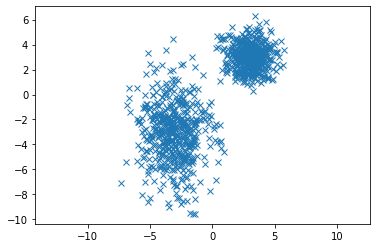

In [100]:
mean = [ 3 , 3 ]
cov = [ [ 1 , 0 ] , [0 , 1 ] ]
a = np.random.multivariate_normal (mean, cov , 500 ).T
a_x, a_y = a[0], a[1]
mean = [-3 ,-3]
cov = [ [ 2 , 0 ] , [0 , 5 ] ]
b = np.random.multivariate_normal (mean, cov , 500 ).T
c = np.concatenate ( ( a , b ) , axis = 1 )
c = c.T
np.random.shuffle ( c )
c = c.T
x_r = c [0 ]
y_r = c [ 1 ]
plt.plot ( x_r , y_r, "x" )
plt.axis ( "equal" )
plt.show ( )

In [101]:
print(c.shape)
df = pd.DataFrame(data=c.T, columns=['x0', 'x1'])
df['y'] = df.apply(lambda x: 1 if (x['x0'] in a_x and x['x1'] in a_y) else 2, axis=1)
print(df.head())

    



(2, 1000)
         x0        x1  y
0  3.659130  3.969122  1
1 -4.347493 -2.880273  2
2 -4.343807 -3.481879  2
3  2.948175  2.244014  1
4  3.030890  3.692013  1


In [104]:
alpha = 10**-3
def calculateDistanceBetweenTwoPoints(p1, p2):
    return np.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )



def applyAdaptionRule(df, p1, p2, r1, r2):

    # print(df.head())
    df.drop("y", axis=1, inplace=True)
    # print(df.values)
    r1s = []

    r2s = []
    for index, item in enumerate(df.values):
        # print(item.shape)
        x_p = np.array(item)
        distance_p1 = calculateDistanceBetweenTwoPoints(x_p, p1)
        distance_p2 = calculateDistanceBetweenTwoPoints(x_p, p2)
        if(distance_p1 < distance_p2):
            r1 = (1-alpha)*r1 + alpha*x_p
            r1s.append(r1)
        else:
            r2 = (1-alpha)*r2 + alpha*x_p
            r2s.append(r2)


    return r1s, r2s ,r1, r2
        # raise Exception
        # for pindex, point in enumerate(points):



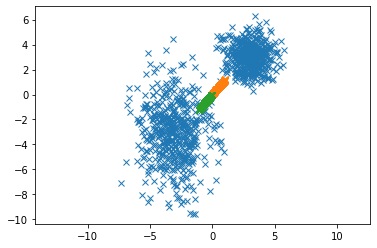

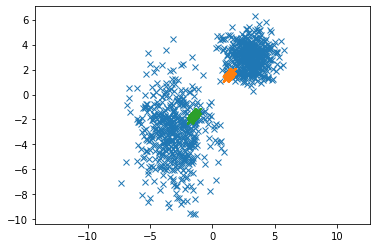

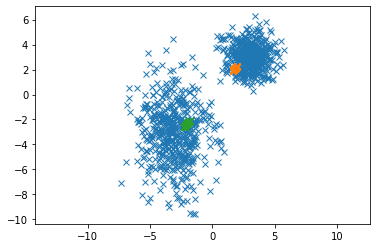

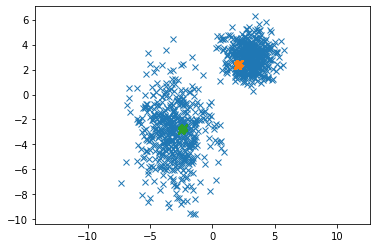

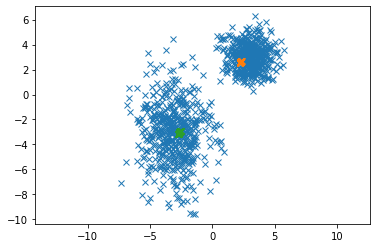

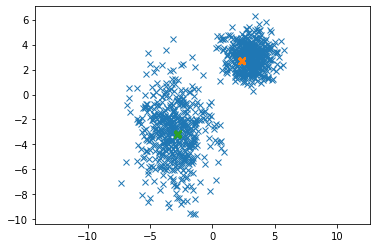

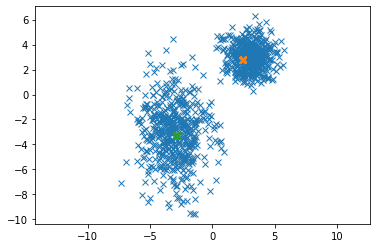

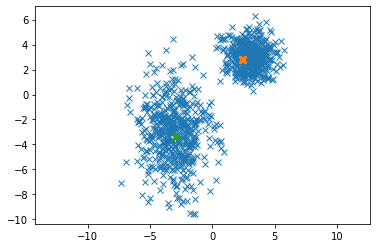

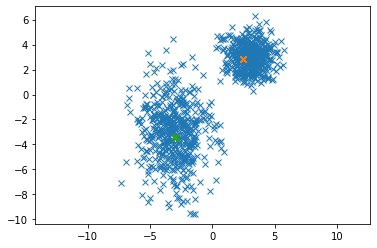

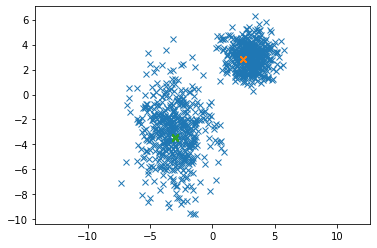

In [107]:
r1s = []
r2s = []
r1 = 0
r2 = 0
for i in range(0, 10):
    p1 = np.array([3.448600, 2.448923])
    p2 = np.array([3.789874, -0.977343])

    r1_s, r2_s, r1, r2 = applyAdaptionRule(df.copy(), p1, p2, r1, r2)
    c = np.array(r1_s).T
    c2 = np.array(r2_s).T

    x1, y1 = c
    x2, y2 = c2
    plt.plot ( x_r , y_r, "x" )
    plt.plot ( x1 , y1, "x" )
    plt.plot ( x2 , y2, "x" )

    plt.axis ( "equal" )
    plt.show ()
    
    # raise Exception
    r1s.append(r1_s)
    r2s.append(r2_s)


In [156]:

alpha = 10**-3

def applyAdaptionRuleEx2(df, p1, p2, r1, r2):

    # print(df.head())

    df.drop("y", axis=1, inplace=True)
    # print(df.values)
    d1 = 0
    d2 = 0
    for index, item in enumerate(df.values):
        # print(item.shape)
        x_p = np.array(item)
        distance_p1 = calculateDistanceBetweenTwoPoints(x_p, p1)
        distance_p2 = calculateDistanceBetweenTwoPoints(x_p, p2)
        if(distance_p1 < distance_p2):
            # r1 = (1-alpha)*r1 + alpha*x_p
            d1 = d1 + (np.array(item) - r1)
                    # print(d1)
                    # raise Exception

        else:
            # r2 = (1-alpha)*r2 + alpha*x_p
            d2 = d2 + (np.array(item) - r2)
        
        r1 = r1 + (alpha/len(df.values)) * d1
        r2 = r2 + (alpha/len(df.values)) * d2

    print(r2, r2)
    return r1, r2

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


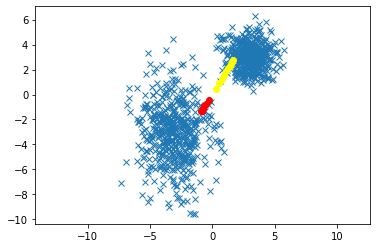

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


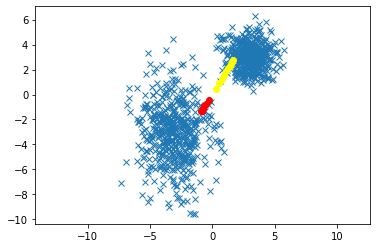

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


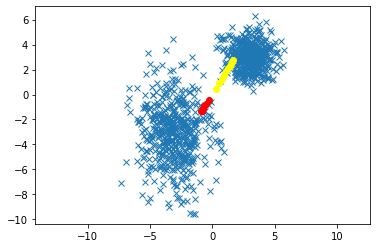

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


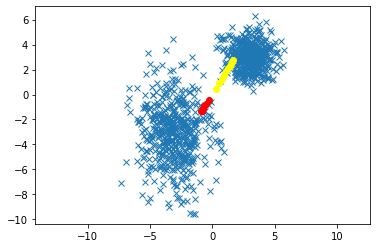

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


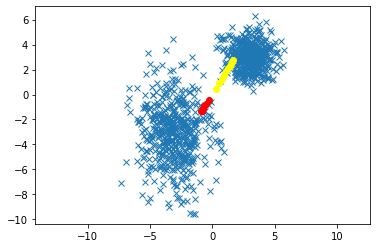

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


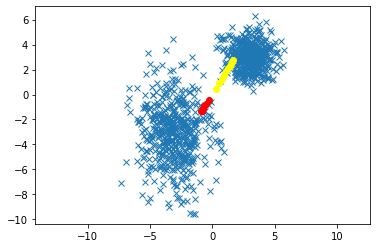

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


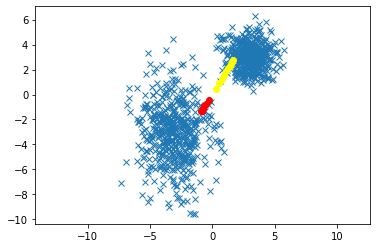

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


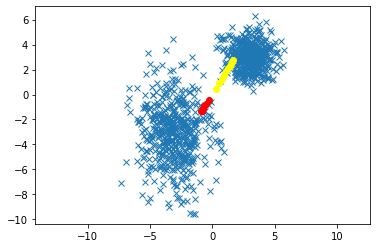

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


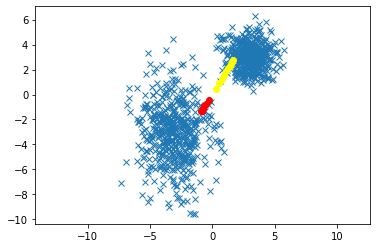

[0.29410715 0.48165785] [0.29410715 0.48165785]
[0.54934051 0.89965228] [0.54934051 0.89965228]
[0.77083823 1.26239803] [0.77083823 1.26239803]
[0.96305936 1.57719763] [0.96305936 1.57719763]
[1.12987354 1.8503884 ] [1.12987354 1.8503884 ]
[1.27463895 2.08747001] [1.27463895 2.08747001]
[1.4002699  2.29321521] [1.4002699  2.29321521]
[1.50929551 2.47176591] [1.50929551 2.47176591]
[1.60391058 2.62671656] [1.60391058 2.62671656]
[1.68601985 2.76118651] [1.68601985 2.76118651]


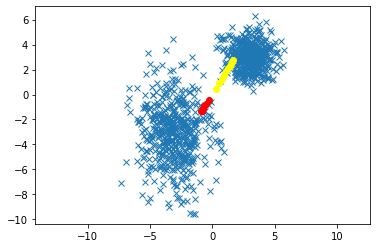

In [158]:

for xss in range(0, 10):

    r1 = 0
    r2 = 0

    p1 = np.array([3.448600, 2.448923])
    p2 = np.array([ 3.030890, 3.692013])
    r1s = []
    r2s = []
    for i in range(0, 10):

        r1, r2 = applyAdaptionRuleEx2(df.copy(), p1, p2, r1, r2)
        r1s.append(r1)
        r2s.append(r2)

    c = np.array(r1s).T
    c2 = np.array(r2s).T

    x1, y1 = c
    x2, y2 = c2
    plt.plot ( x_r , y_r, "x" )
    plt.plot ( x1 , y1, "o" , color='red')
    plt.plot ( x2 , y2, "o" , color='yellow')

    plt.axis ( "equal" )
    plt.show ()
    
